In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_NBM= pd.read_csv('../../../datasets/NSC_BND_M20.csv')
df_NBM[:2]

C:\Users\01-15\AppData\Local\Temp\ipykernel_13320\3623201489.py:1: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NBM= pd.read_csv('../../../datasets/NSC_BND_M20.csv')


,Unnamed: 0,_id,RN_INDI,BTH_YYYY,DTH_YYYYMM,COD1,COD2,RN_KEY,RN_INST,MDCARE_STRT_DT,...,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,0,64e6d1c0b5e01adfd8979e02,294364,1921LE,200707.0,T08-T14,W00-W19,2002080298703,26452,20020830,...,0,1,1,3,5.0,0.15,10590,3000,7590,2002
1,1,64e6d1c0b5e01adfd8979e03,294364,1921LE,200707.0,T08-T14,W00-W19,2002090466395,63715,20020910,...,0,1,1,2,5.0,0.15,16520,4950,11570,2002


In [3]:
df_NBM['SICK_SYM1'].value_counts()

J209     8244
I10      4629
I109     3275
F_       3203
N_       3177
         ... 
H700        1
E058        1
M5397       1
T18         1
P289        1
Name: SICK_SYM1, Length: 3414, dtype: int64

In [4]:
import re # 정규화식을 위함, 뤼튼에 물어봐서 진행

In [5]:
pattern = r'_'
matching_values = df_NBM[df_NBM['SICK_SYM1'].str.contains(pattern, regex=True)]['SICK_SYM1']

In [6]:
matching_values.value_counts()

F_    3203
N_    3177
Z_    1568
B_     943
J_     755
O_     421
G_     358
C_     340
A_     312
D_     147
Q_      62
R_      22
E_      20
H_      10
S_       7
T_       4
I_       3
K_       2
Name: SICK_SYM1, dtype: int64

###### 뤼튼에게 물어봄
가지고 있는 csv의 SICK_SYM1의 value들이 문자와 숫자 특수기호가 섞여있어. Index(['J209', 'I10', 'I109', 'F_', 'N_', 'J00', 'J039', 'J029', 'M170',
'J069',
...
'H518', 'H499', 'M4026', 'L419', 'H186', 'H700', 'E058', 'M5397', 'T18',
'P289'],
dtype='object', length=3414)
나는 def와 정규식표현을 이용해서
첫번째, [A-Z] 를 숫자 [0-9] 형식으로 변경해서 SICK_SYM1의 value들이 숫자형식으로 변경되면 좋겠어.
두번째, '_'는 숫자를 1로 표현하고싶어.
어떻게 코드를 작성하면 좋을까??

In [7]:
def convert_to_numeric(value):
    if re.match(r'[A-Z]', value):
        return re.sub(r'[A-Z]', lambda x: str(ord(x.group()) - ord('A')), value)
    elif '_' in value:
        return re.sub('_', '1', value)
    else:
        return value

In [8]:
df_NBM['SICK_SYM1'] = df_NBM['SICK_SYM1'].apply(convert_to_numeric)

In [9]:
df_NBM['SICK_SYM1'].value_counts()

9209     8244
810      4629
8109     3275
5_       3203
13_      3177
         ... 
362         1
7494        1
16775       1
19213       1
15289       1
Name: SICK_SYM1, Length: 3402, dtype: int64

In [10]:
df_NBM['SICK_SYM1'] = df_NBM['SICK_SYM1'].apply(convert_to_numeric)

In [11]:
df_NBM['SICK_SYM1'] = df_NBM['SICK_SYM1'].astype(int)

In [12]:
df_NBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137163 entries, 0 to 137162
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          137163 non-null  int64  
 1   _id                 137163 non-null  object 
 2   RN_INDI             137163 non-null  int64  
 3   BTH_YYYY            137163 non-null  object 
 4   DTH_YYYYMM          10269 non-null   float64
 5   COD1                8473 non-null    object 
 6   COD2                998 non-null     object 
 7   RN_KEY              137163 non-null  int64  
 8   RN_INST             137163 non-null  int64  
 9   MDCARE_STRT_DT      137163 non-null  int64  
 10  FORM_CD             137163 non-null  int64  
 11  MCARE_SUBJ_CD       137163 non-null  int64  
 12  SICK_SYM1           137163 non-null  int32  
 13  OFIJ_TYPE           134428 non-null  object 
 14  OPRTN_YN            137163 non-null  int64  
 15  MDCARE_DD_CNT       137163 non-nul

In [13]:
df_NBM['SICK_SYM1'].value_counts()

9209     8244
810      4629
8109     3275
51       3203
131      3177
         ... 
7494        1
16775       1
19213       1
19044       1
15289       1
Name: SICK_SYM1, Length: 3400, dtype: int64

In [14]:
#top 8개
df_NBM['SICK_SYM1'].value_counts().head(8)

9209    8244
810     4629
8109    3275
51      3203
131     3177
900     2247
9039    2067
9029    1980
Name: SICK_SYM1, dtype: int64

In [15]:
conditions = ((df_NBM['SICK_SYM1'] == 9209)|(df_NBM['SICK_SYM1'] == 810)|(df_NBM['SICK_SYM1'] == 8109)|(df_NBM['SICK_SYM1'] == 51)|(df_NBM['SICK_SYM1'] == 131)|(df_NBM['SICK_SYM1'] == 900)|(df_NBM['SICK_SYM1'] == 9039)|(df_NBM['SICK_SYM1'] == 9029))
df_NBM_top8 = df_NBM[conditions]
df_NBM_top8[:2]

,Unnamed: 0,_id,RN_INDI,BTH_YYYY,DTH_YYYYMM,COD1,COD2,RN_KEY,RN_INST,MDCARE_STRT_DT,...,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
10,10,64e6d1c0b5e01adfd8979e0c,294364,1921LE,200707.0,T08-T14,W00-W19,2002100889727,83099,20021008,...,0,1,1,0,5.0,0.15,10590,3000,7590,2002
11,11,64e6d1c0b5e01adfd8979e0d,294364,1921LE,200707.0,T08-T14,W00-W19,2002110044695,6880,20021126,...,0,1,1,3,1.0,0.25,12240,6120,6120,2002


### data preprocessing - 전처리
- 목표변수: 'SICK_SYM1'
- 설명변수:' MDCARE_DD_CNT'요양일수, 'TOT_PRSC_DD_CNT'총처방일수, 'EDC_ADD_RT'심결가산율, 'ED_RC_TOT_AMT'심결요양급여비용총액, 'EDC_SBA'심결본인부담금

In [16]:
df_NBM.columns

Index(['Unnamed: 0', '_id', 'RN_INDI', 'BTH_YYYY', 'DTH_YYYYMM', 'COD1',
       'COD2', 'RN_KEY', 'RN_INST', 'MDCARE_STRT_DT', 'FORM_CD',
       'MCARE_SUBJ_CD', 'SICK_SYM1', 'OFIJ_TYPE', 'OPRTN_YN', 'MDCARE_DD_CNT',
       'VSHSP_DD_CNT', 'TOT_PRSC_DD_CNT', 'MCARE_RSLT_TYPE', 'EDC_ADD_RT',
       'ED_RC_TOT_AMT', 'EDC_SBA', 'EDC_INSUR_BRDN_AMT', 'STD_YYYY'],
      dtype='object')

In [17]:
df_NBM.describe()

,Unnamed: 0,RN_INDI,DTH_YYYYMM,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
count,137163.000000,1.371630e+05,10269.000000,1.371630e+05,137163.000000,1.371630e+05,137163.000000,137163.000000,1.371630e+05,137163.000000,137163.000000,137163.000000,137163.000000,133958.000000,137163.000000,1.371630e+05,1.371630e+05,1.371630e+05,137163.000000
mean,68581.000000,6.219426e+05,201461.303827,2.009887e+12,72441.668446,2.009887e+07,3.134767,7.012948,3.697304e+04,0.158986,1.977071,1.300190,8.787049,1.665656,0.163576,4.800070e+04,1.079379e+04,3.711239e+04,2009.819828
std,39595.691824,5.250558e+05,434.164789,3.710175e+09,43045.267803,3.710000e+04,0.985421,6.029033,1.464989e+05,1.185583,5.014257,1.769308,17.412973,1.784243,0.047625,3.264981e+05,5.320642e+04,2.838561e+05,3.710555
min,0.000000,1.433000e+03,200707.000000,2.002010e+12,8.000000,2.002010e+07,2.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2002.000000
25%,34290.500000,2.676310e+05,201106.000000,2.007091e+12,34440.000000,2.007092e+07,3.000000,1.000000,4.039000e+03,0.000000,1.000000,1.000000,0.000000,1.000000,0.150000,1.057000e+04,2.500000e+03,7.570000e+03,2007.000000
50%,68581.000000,5.166210e+05,201508.000000,2.010100e+12,71653.000000,2.010101e+07,3.000000,5.000000,9.209000e+03,0.000000,1.000000,1.000000,3.000000,1.000000,0.150000,1.328000e+04,3.500000e+03,9.800000e+03,2010.000000
75%,102871.500000,7.927530e+05,201909.000000,2.013061e+12,109296.000000,2.013061e+07,3.000000,12.000000,1.272500e+04,0.000000,1.000000,1.000000,7.000000,1.000000,0.150000,2.045000e+04,6.000000e+03,1.412000e+04,2013.000000
max,137162.000000,3.000758e+06,202105.000000,2.015123e+12,147294.000000,2.015123e+07,15.000000,99.000000,1.892230e+06,9.000000,120.000000,62.000000,365.000000,9.000000,0.300000,5.568301e+07,4.431340e+06,5.284227e+07,2015.000000


In [18]:
df_NBM_extract=df_NBM[['SICK_SYM1','MDCARE_DD_CNT','TOT_PRSC_DD_CNT','EDC_ADD_RT','ED_RC_TOT_AMT','EDC_SBA']]
df_NBM_extract.isnull().sum()

SICK_SYM1          0
MDCARE_DD_CNT      0
TOT_PRSC_DD_CNT    0
EDC_ADD_RT         0
ED_RC_TOT_AMT      0
EDC_SBA            0
dtype: int64

In [19]:
target_train = df_NBM_extract['SICK_SYM1']
features_train = df_NBM_extract.drop(columns=['SICK_SYM1'])
target_train.shape, features_train.shape

((137163,), (137163, 5))

### 모델 학습
- 목표변수: 범주형 _ 여러개 
    - ⇒ from sklearn.tree import DecisionTreeClassifier 

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [21]:
model.fit(features_train, target_train)

DecisionTreeClassifier()

In [22]:
from sklearn.tree import plot_tree

In [23]:
# features_train.columns# 이게 list로 들어가야함. 
features_train.columns.to_list()

['MDCARE_DD_CNT', 'TOT_PRSC_DD_CNT', 'EDC_ADD_RT', 'ED_RC_TOT_AMT', 'EDC_SBA']

In [24]:
##Tree 구조 그려보기 matplotlib로 이용해서 그려보기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [25]:
# features_train.columns# 이게 list로 들어가야함. 
features_train.columns.to_list()

['MDCARE_DD_CNT', 'TOT_PRSC_DD_CNT', 'EDC_ADD_RT', 'ED_RC_TOT_AMT', 'EDC_SBA']

In [26]:
%matplotlib tk 

In [27]:
plt.figure(figsize=(50,30))
plot_tree(model, feature_names=features_train.columns.to_list(), filled=True)
plt.show()

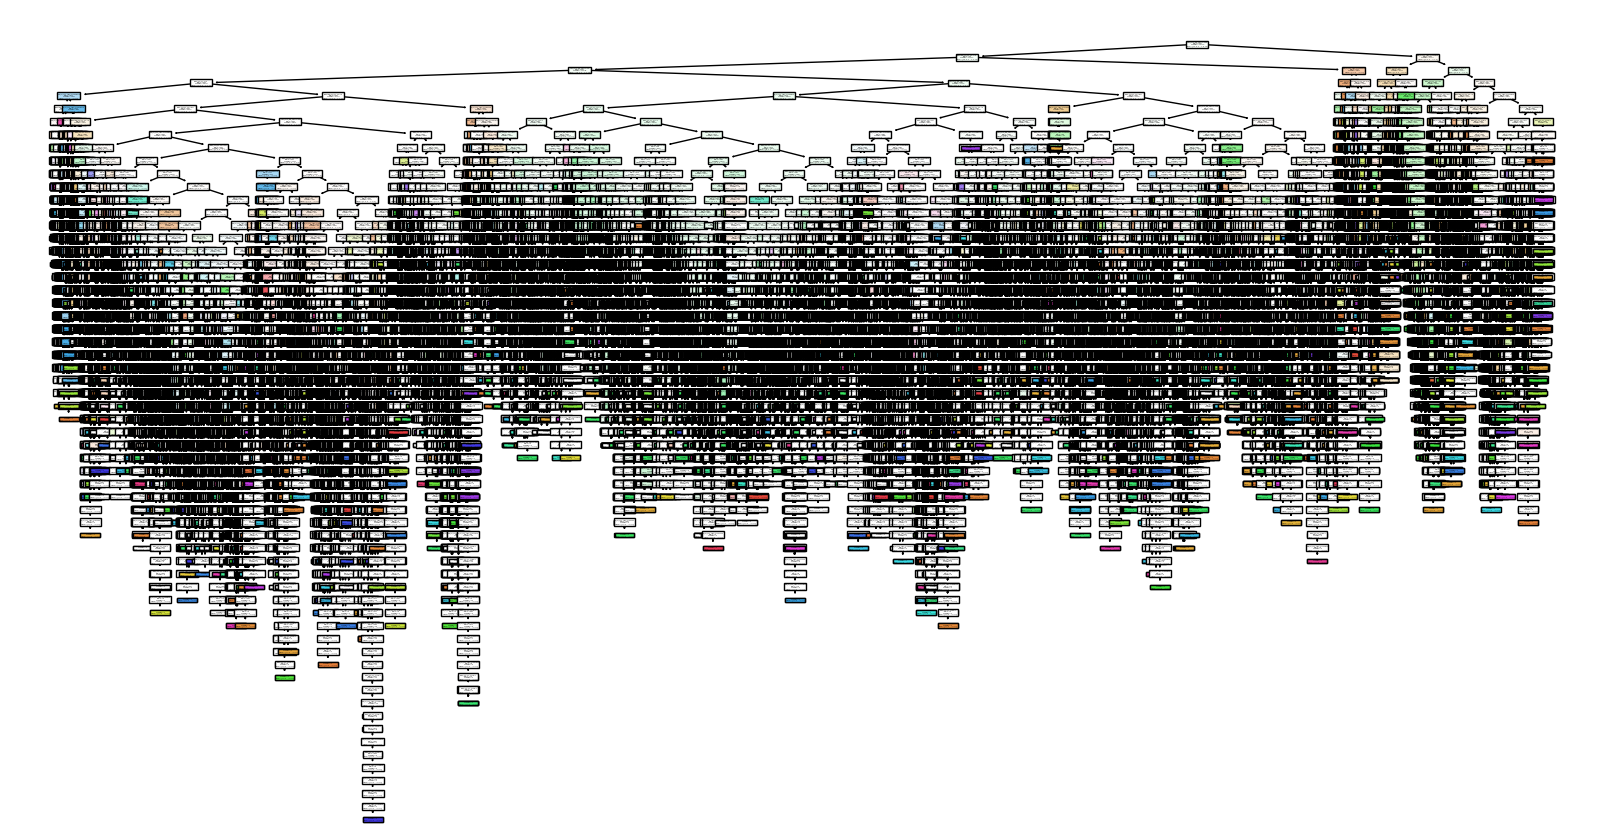

#### 평가

In [28]:
target_predict = model.predict(features_train)
target_predict.shape

(137163,)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(target_train, target_predict)

0.5957729125201403